In [111]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
767,767,1911,1987,S1,Bertunangan,67430000.0,0,0,05-09-2012,6,595000,97000,291000,127000,133000,121000,1,11,5,12,6,0,0,0,0,0,0,3,11,0
1221,1221,1176,1973,S1,Menikah,26228000.0,1,0,22-09-2013,50,2000,6000,4000,3000,1000,9000,1,1,0,2,8,0,0,0,0,0,0,3,11,0
1552,1552,8091,1956,S1,Menikah,63943000.0,0,1,02-09-2012,50,423000,184000,368000,13000,97000,21000,1,6,4,6,5,0,0,0,0,0,0,3,11,0
587,587,5057,1961,S2,Menikah,61794000.0,0,1,14-09-2013,74,264000,47000,188000,54000,47000,11000,2,4,4,10,2,0,0,0,0,0,0,3,11,0
2050,2050,626,1951,S1,Menikah,32871000.0,1,1,09-03-2013,28,22000,2000,12000,0,2000,5000,1,1,0,3,4,0,0,0,0,0,0,3,11,0


# Exploratory Data Analysis

## Data Cleaning

In [3]:
#check data info and unique value
print(df.info())

for x in df.columns:
  print(f"unik dari {x}")
  print(f"{df[x].unique()}")
  print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [4]:
print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i} -> {df[i].nunique()}')

columns and number of unique values
Unnamed: 0 -> 2240
ID -> 2240
Year_Birth -> 59
Education -> 5
Marital_Status -> 6
Income -> 1974
Kidhome -> 3
Teenhome -> 3
Dt_Customer -> 663
Recency -> 100
MntCoke -> 776
MntFruits -> 158
MntMeatProducts -> 558
MntFishProducts -> 182
MntSweetProducts -> 177
MntGoldProds -> 213
NumDealsPurchases -> 15
NumWebPurchases -> 15
NumCatalogPurchases -> 14
NumStorePurchases -> 14
NumWebVisitsMonth -> 16
AcceptedCmp3 -> 2
AcceptedCmp4 -> 2
AcceptedCmp5 -> 2
AcceptedCmp1 -> 2
AcceptedCmp2 -> 2
Complain -> 2
Z_CostContact -> 1
Z_Revenue -> 1
Response -> 2


In [5]:
#check null values and duplicated
print(df.isnull().sum())

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [6]:
print(df.duplicated().sum())

0


In [7]:
df[df['Income'].isnull()]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,10,1994,1983,S1,Menikah,NaN,1,0,15-11-2013,11,5000,5000,6000,0,2000,1000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,27,5255,1986,S1,Lajang,NaN,1,0,20-02-2013,19,5000,1000,3000,3000,263000,362000,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,43,7281,1959,S3,Lajang,NaN,0,0,05-11-2013,80,81000,11000,50000,3000,2000,39000,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,48,7244,1951,S1,Lajang,NaN,2,1,01-01-2014,96,48000,5000,48000,6000,10000,7000,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,58,8557,1982,S1,Lajang,NaN,1,0,17-06-2013,57,11000,3000,22000,2000,2000,6000,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,71,10629,1973,D3,Menikah,NaN,1,0,14-09-2012,25,25000,3000,43000,17000,4000,17000,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,90,8996,1957,S3,Menikah,NaN,2,1,19-11-2012,4,230000,42000,192000,49000,37000,53000,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,91,9235,1957,S1,Lajang,NaN,1,1,27-05-2014,45,7000,0,8000,2000,0,1000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,92,5798,1973,S2,Bertunangan,NaN,0,0,23-11-2013,87,445000,37000,359000,98000,28000,18000,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,128,8268,1961,S3,Menikah,NaN,0,1,11-07-2013,23,352000,0,27000,10000,0,15000,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [8]:
df['Income'].value_counts()

7500000.0     12
35860000.0     4
37760000.0     3
83844000.0     3
63841000.0     3
              ..
40760000.0     1
41452000.0     1
6835000.0      1
33622000.0     1
52869000.0     1
Name: Income, Length: 1974, dtype: int64

Income value is NaN means not defined and this is one of important feature we have, to prevent bias interpretation and it's unique value is too much and we can't input it one of it's value or median or mean, so we will drop it.

In [9]:
df = df[~((df['Income'].isnull()))]

## Feature Engineering

Because it is marketing team problem, we need to show it's conversion rate column.<br>
Conversion Rate = (total transaction/total web visit)*100<br>
[Conversion Rate Reference](https://www.qiscus.com/id/blog/cara-optimasi-conversion-rate-dan-cara-menghitung/)

In [10]:
#create total transaction column
df['Total_transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [67]:
#create conversion rate column
df['Conversion_Rate'] = df['Total_transaction'] / df['NumWebVisitsMonth']

We need to create age column for age interpretation of conversion rate, because age is one of categorical that often used for user categorical. For others categorical we can look at Income column.

In [11]:
#create age column
df['Age'] = 2022 - df['Year_Birth']

Then we need to categorize age of customer for better interpretation

<AxesSubplot:xlabel='Age', ylabel='count'>

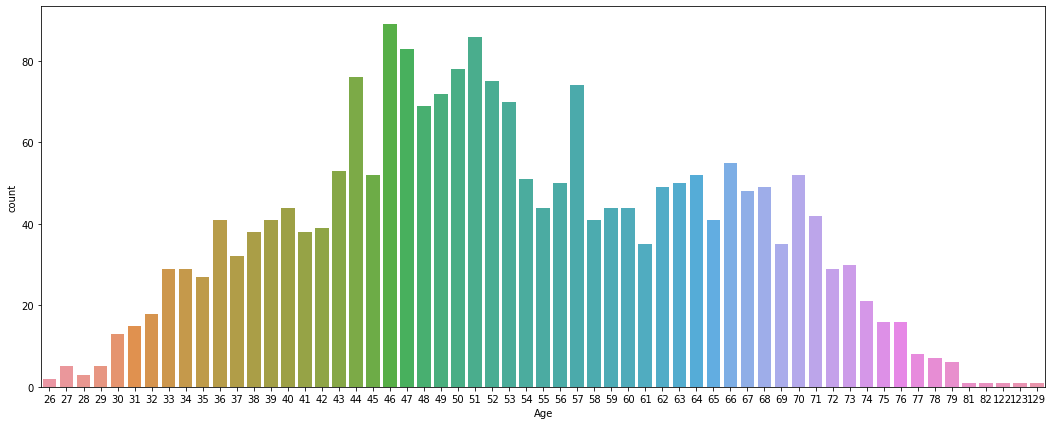

In [24]:
plt.figure(figsize=(18,7))
sns.countplot(data=df, x="Age")

Categorize Age by Ministry of Health:
[Categorize Age](https://muamala.net/kategori-umur-menurut-who/)

In [31]:
bins= [0,25,35,45,55,65,150]
labels = ['Teens','Early Adult','Late Adult','Early Old','Late Old','Older']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

Another data that helpful for us is total spent made by customer, we can create column contains total spent of customer.

In [12]:
df['Total_Spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [68]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_transaction,Age,Total_Spent,AgeGroup,Conversion_Rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,25,65,1617000,Older,3.571429
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,6,68,27000,Older,1.200000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,21,57,776000,Late Old,5.250000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,8,38,53000,Late Adult,1.333333
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,19,41,422000,Late Adult,3.800000


In [43]:
df.AgeGroup.value_counts()

Early Old      725
Late Old       483
Older          460
Late Adult     429
Early Adult    119
Teens            0
Name: AgeGroup, dtype: int64

## Analysis Conversion Rate to Other Feature

### Univariate Analysis

In [35]:
num = df.select_dtypes(include=[np.number])
cat = df.select_dtypes(exclude=[np.number])

numerical= num.columns
categorical = cat.columns 
print(numerical)
print(categorical)

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Total_transaction', 'Age', 'Total_Spent',
       'Conversion_Rate'],
      dtype='object')
Index(['Education', 'Marital_Status', 'Dt_Customer', 'AgeGroup'], dtype='object')


In [37]:
num.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_transaction,Age,Total_Spent,Conversion_Rate
count,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2.216000e+03,2214.000000
mean,1121.867329,5588.353339,1968.820397,5.224725e+07,0.441787,0.505415,49.012635,3.050916e+05,26356.046931,1.669959e+05,37637.635379,27028.880866,43965.252708,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,14.880866,53.179603,6.070754e+05,inf
std,643.164161,3249.376275,11.985554,2.517308e+07,0.536896,0.544181,28.948352,3.373279e+05,39793.916518,2.242833e+05,54752.082415,41072.045667,51815.414374,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,7.670957,11.985554,6.029005e+05,NaN
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,26.000000,5.000000e+03,0.000000
25%,566.750000,2814.750000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.400000e+04,2000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,8.000000,45.000000,6.900000e+04,125.000000
50%,1120.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.745000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24500.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,15.000000,52.000000,3.965000e+05,266.666667
75%,1678.250000,8421.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.050000e+05,33000.000000,2.322500e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,21.000000,63.000000,1.048000e+06,550.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,262000.000000,321000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,44.000000,129.000000,2.525000e+06,inf


In [42]:
df[df['NumWebVisitsMonth']==0]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_transaction,Age,Total_Spent,AgeGroup,Conversion_Rate
164,164,8475,1973,S3,Menikah,157243000.0,0,1,01-03-2014,98,20000,2000,1582000,1000,2000,1000,15,0,22,0,0,0,0,0,0,0,0,3,11,0,37,49,1608000,Early Old,inf
655,655,5555,1975,S1,Cerai,153924000.0,0,0,07-02-2014,81,1000,1000,1000,1000,1000,1000,0,0,0,0,0,0,0,0,0,0,0,3,11,0,0,47,6000,Early Old,NaN
687,687,1501,1982,S3,Menikah,160803000.0,0,0,04-08-2012,21,55000,16000,1622000,17000,3000,4000,15,0,28,1,0,0,0,0,0,0,0,3,11,0,44,40,1717000,Late Adult,inf
905,905,11074,1977,S1,Lajang,85072000.0,0,0,09-04-2014,94,494000,92000,391000,194000,11000,241000,1,3,4,10,0,0,0,0,0,0,0,3,11,0,18,45,1423000,Early Old,inf
975,975,10286,1962,S1,Menikah,83715000.0,0,0,03-02-2014,2,318000,8000,407000,150000,35000,8000,1,2,8,13,0,0,0,0,0,0,0,3,11,0,24,60,926000,Late Old,inf
1773,1773,8584,1952,S3,Bertunangan,85431000.0,0,0,08-06-2013,54,376000,53000,462000,168000,53000,53000,1,2,7,7,0,0,0,0,0,0,0,3,11,0,17,70,1165000,Older,inf
1806,1806,6237,1966,S3,Lajang,7144000.0,0,2,07-12-2013,92,81000,4000,33000,5000,2000,291000,0,23,1,1,0,0,0,0,0,0,0,3,11,0,25,56,416000,Late Old,inf
1910,1910,5832,1960,D3,Bertunangan,92556000.0,0,0,20-04-2014,32,493000,183000,352000,184000,23000,28000,0,3,5,13,0,0,0,0,0,0,0,3,11,0,21,62,1263000,Late Old,inf
1955,1955,6428,1950,S3,Janda,76842000.0,0,0,03-05-2014,37,605000,10000,345000,84000,54000,32000,1,1,8,7,0,0,0,0,0,0,0,3,11,0,17,72,1130000,Older,inf
2132,2132,11181,1949,S3,Menikah,156924000.0,0,0,29-08-2013,85,2000,1000,2000,1000,1000,1000,0,0,0,0,0,0,0,0,0,0,0,3,11,0,0,73,8000,Older,NaN


we will drop these rows because has no visit on web but turns out they have purchased item

In [44]:
df = df[~((df['NumWebVisitsMonth']==0))]

In [46]:
cat.describe()

,Education,Marital_Status,Dt_Customer,AgeGroup
count,2216,2216,2216,2216
unique,5,6,662,5
top,S1,Menikah,31-08-2012,Early Old
freq,1116,857,12,725


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


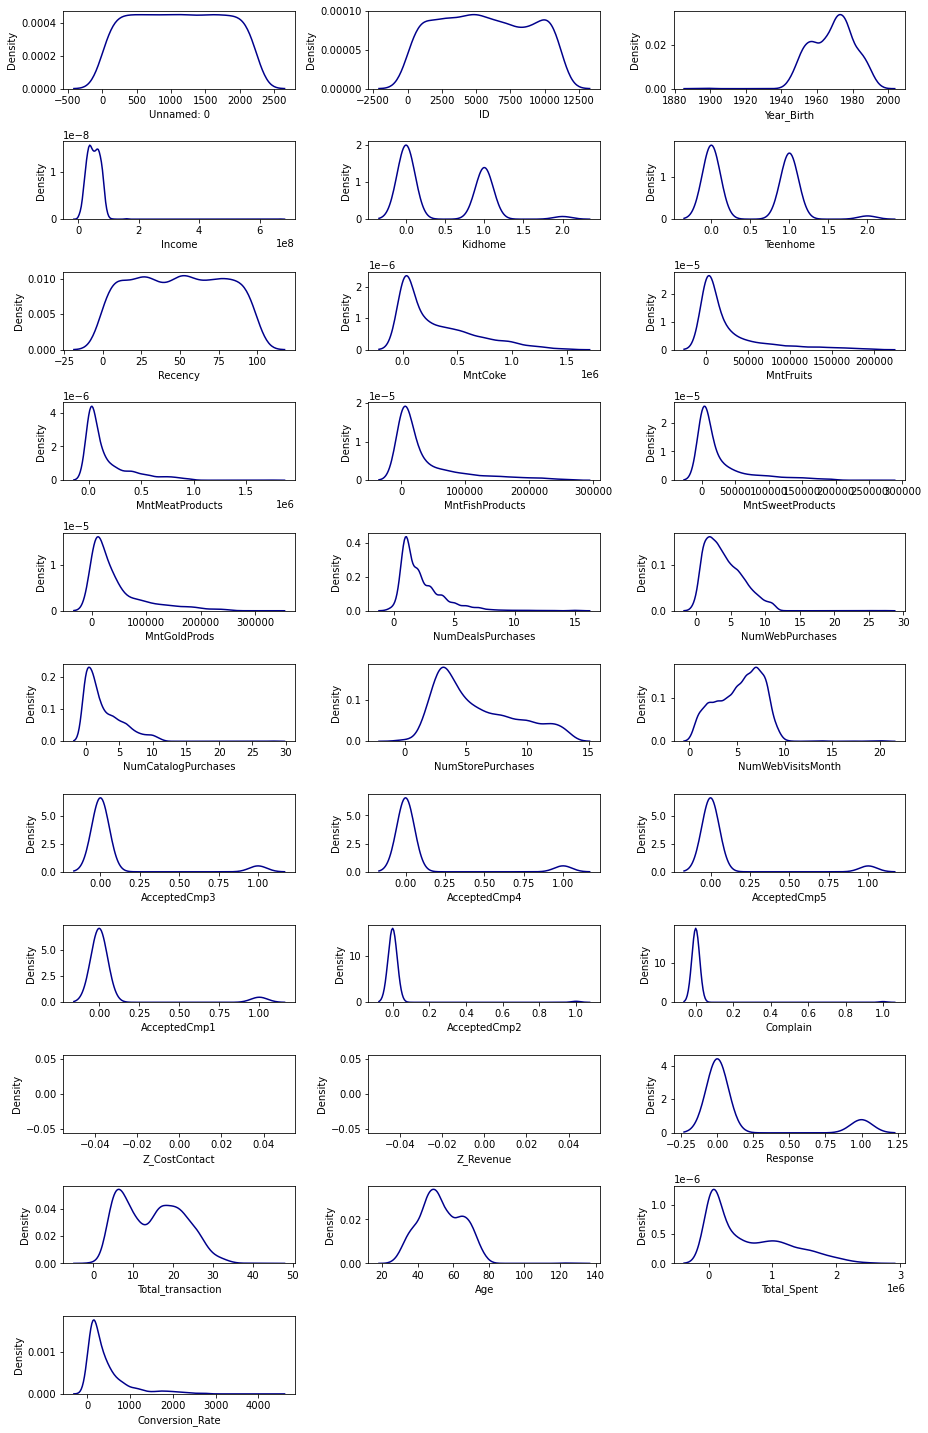

In [54]:
features1 = numerical
for i in range(0, len(features1)):
    plt.rcParams['figure.figsize'] = (13,25)
    plt.subplot(14, 3, i+1)
    sns.kdeplot(x=df[features1[i]], color='darkblue')
    plt.tight_layout()

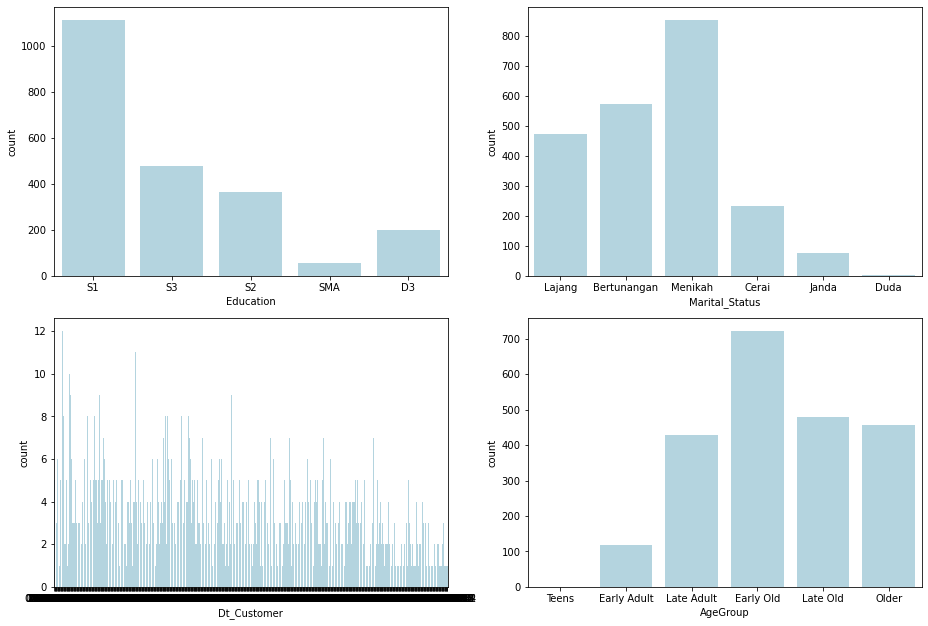

In [55]:
features2 = categorical
for i in range(0, len(features2)):
    plt.rcParams['figure.figsize'] = (13,17)
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df[features2[i]], color='lightblue')
    plt.tight_layout()

### Bivariate Analysis

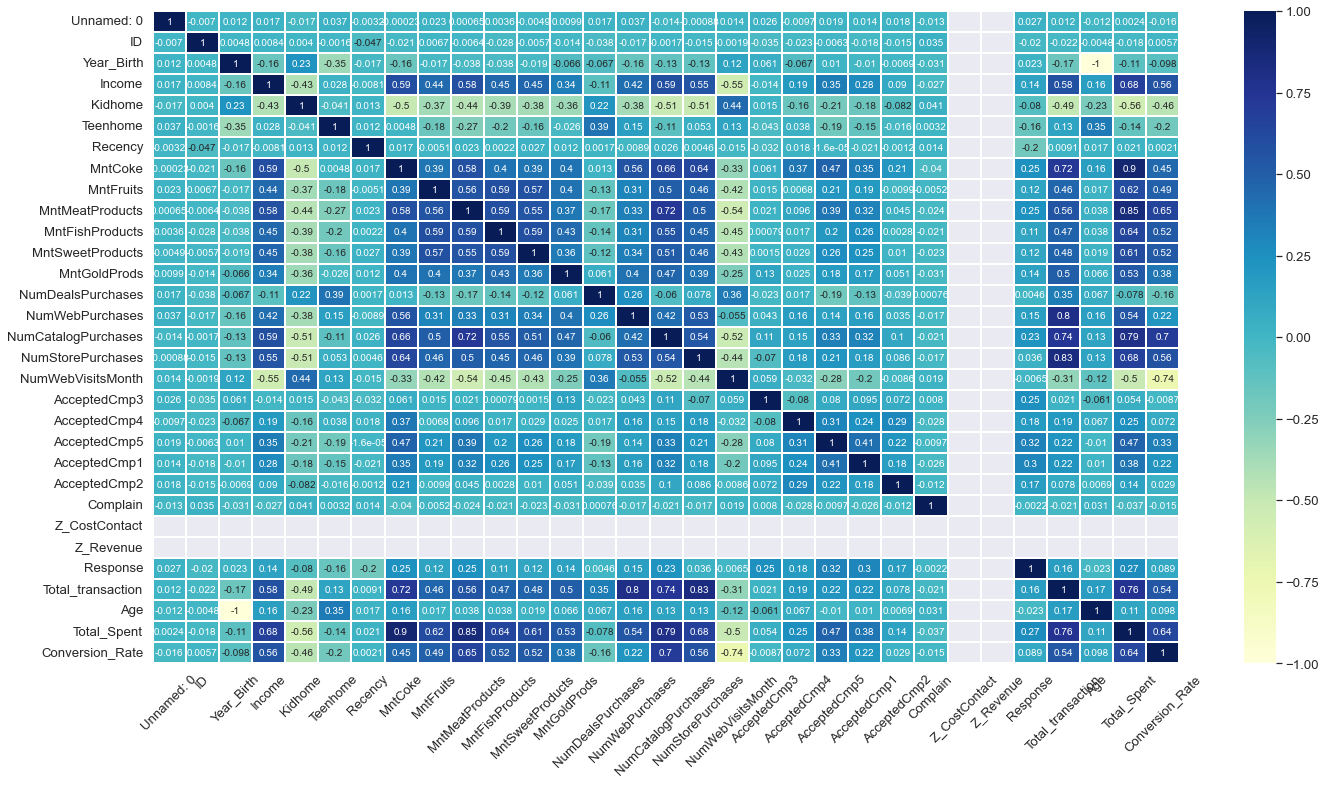

In [60]:
fig, ax = plt.subplots(figsize =(23, 12))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,ax=ax, linewidths=0.1, annot_kws={"fontsize":10})
plt.xticks(rotation = 45)
plt.show()

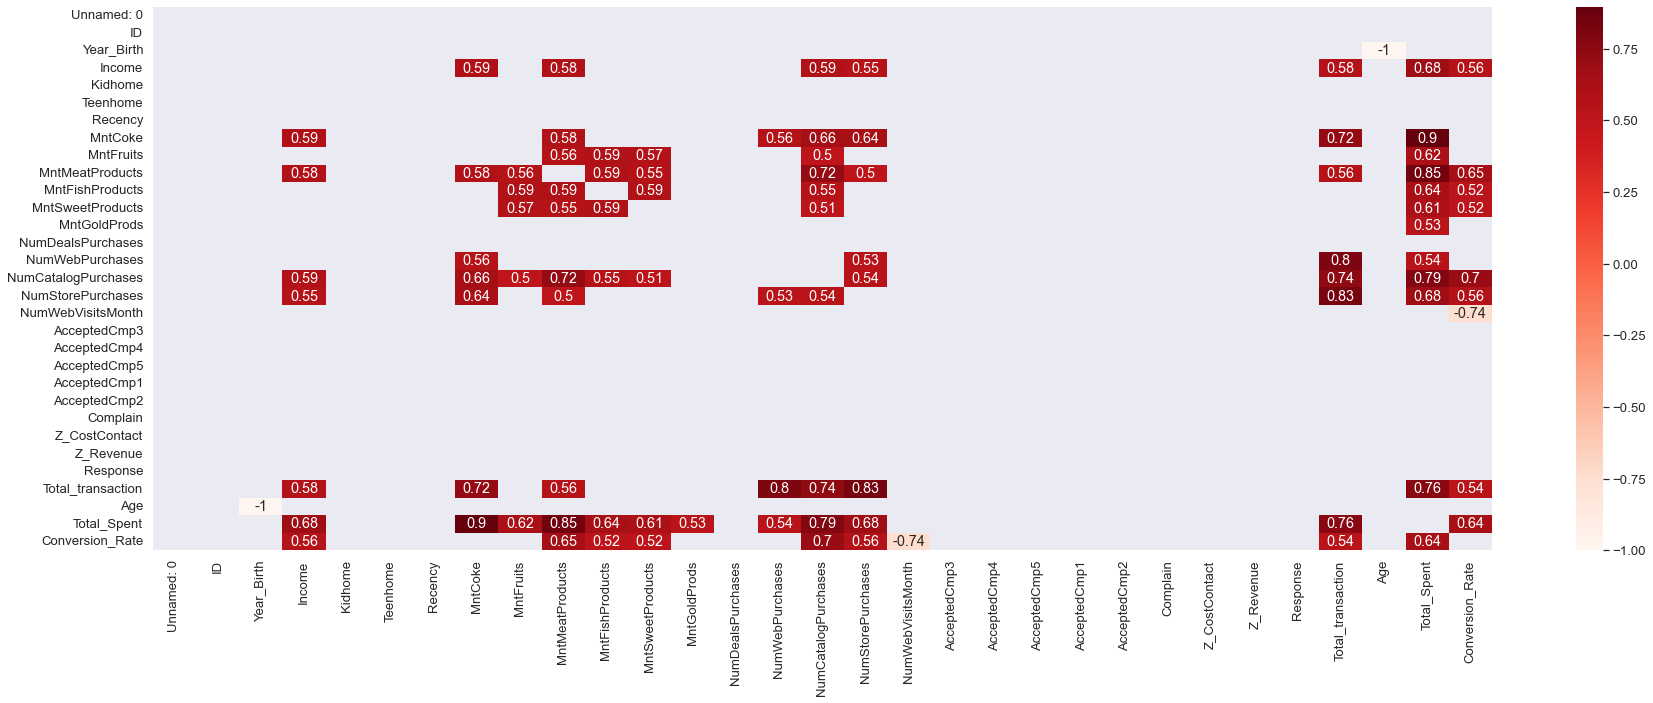

In [63]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.7)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

**Scatterplot Analysis**

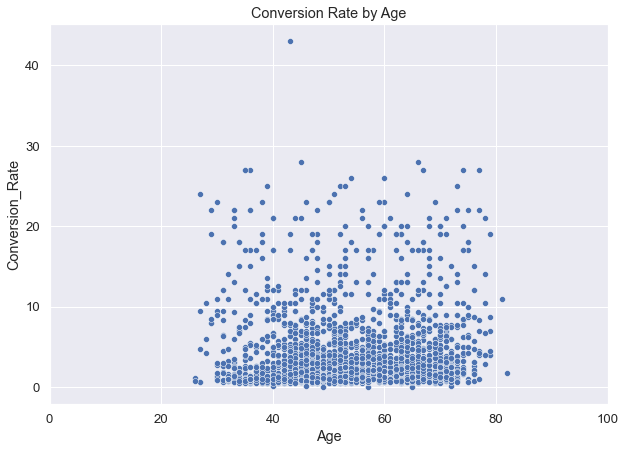

In [84]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="Age", y="Conversion_Rate", palette='crest')
plt.title('Conversion Rate by Age')
plt.xlim(0, 100)
plt.show()

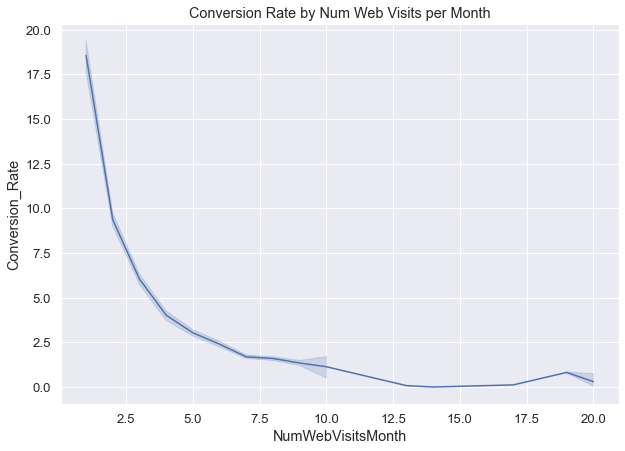

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x="NumWebVisitsMonth", y="Conversion_Rate", palette='crest')
plt.title('Conversion Rate by Num Web Visits per Month')
plt.show()

Number of web visit per month has negative correlation to Conversion Rate means that the more visit web return lower Conversion Rate.

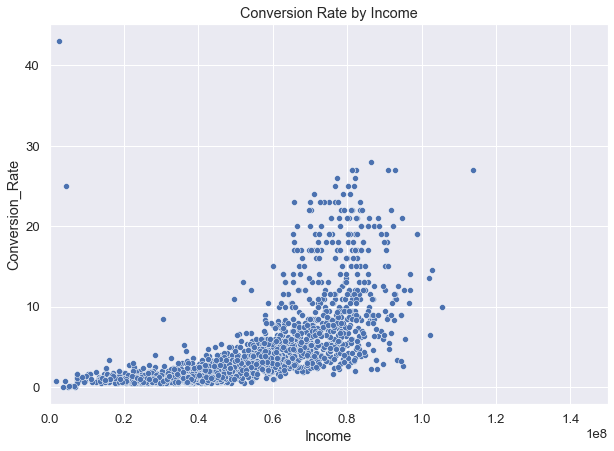

In [89]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="Income", y="Conversion_Rate", palette='crest')
plt.title('Conversion Rate by Income')
plt.xlim(0, 140000000)
plt.show()

Conversion Rate above 10% shown at Income > 50000000, beside that Conversion Rate still under 10%

Age does not effect Conversion Rate

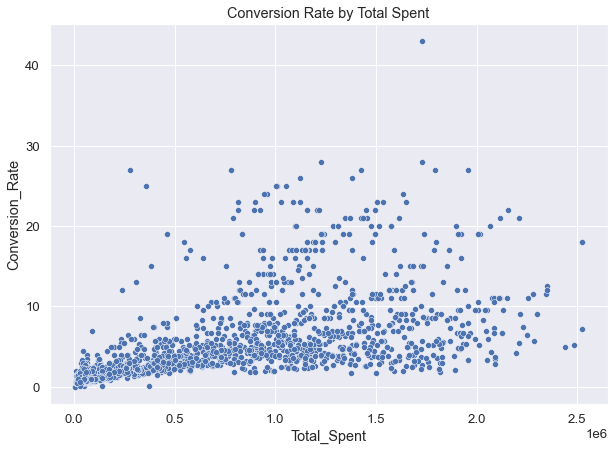

In [85]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="Total_Spent", y="Conversion_Rate", palette='crest')
plt.title('Conversion Rate by Total Spent')
plt.show()

Differential of Total Spent does not really affect Conversion Rate, but we can conlude that most of Conversion >10% is when their Total Spent is > 50000000. 
Conclusion and interpretation of Total Spent and Income when compared with Conversion Rate are almost the same, so we will check Total Spent compared to Income.

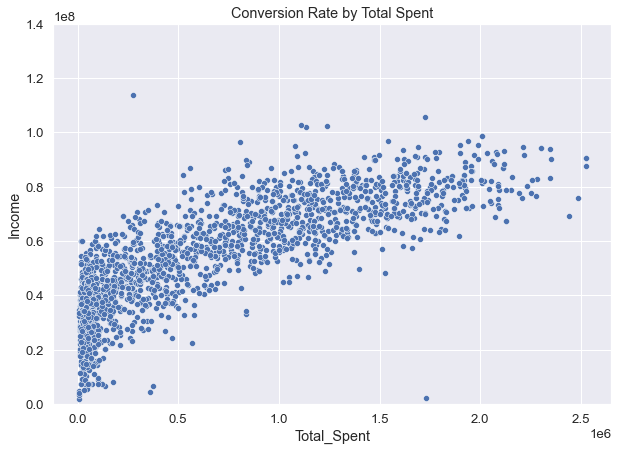

In [91]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="Total_Spent", y="Income", palette='crest')
plt.title('Conversion Rate by Total Spent')
plt.ylim(0, 140000000)
plt.show()

As we can see that Total Spent has a Positive Correlation with Income where the more Income the more amount of customer spent his money.

# Preprocessing

In [136]:
df_set = df.drop(columns=['Dt_Customer']).copy()

In [137]:
map_edu = {'SMA':0,
           'D3':1,
           'S1':2,
           'S2':3,
           'S3':4}

map_status = {'Menikah':0,
              'Bertunangan':1,
              'Lajang':2,
              'Cerai':3,
              'Janda':4,
              'Duda':5}

map_age_group = {'Teens':0,
              'Early Adult':1,
              'Late Adult':2,
              'Early Old':3,
              'Late Old':4,
              'Older':5}

df_set['Education'] = df_set['Education'].map(map_edu)
df_set['Marital_Status'] = df_set['Marital_Status'].map(map_status)
df_set['AgeGroup'] = df_set['AgeGroup'].map(map_age_group)

In [138]:
sc = StandardScaler()
num = ['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Total_transaction', 'Age', 'Total_Spent',
       'Conversion_Rate']
df_set[num] = ss.fit_transform(df_set[num])

df_set.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_transaction,Age,Total_Spent,AgeGroup,Conversion_Rate
0,-1.743925,-0.017125,-0.988076,2,2,0.247791,-0.826172,-0.931800,0.312501,0.976259,1.554391,1.728457,2.468084,1.481511,0.857917,0.361248,1.443634,2.584958,-0.556964,0.689304,-0.282462,-0.283396,-0.281525,-0.262295,-0.117417,-0.098036,0.0,0.0,2.371629,1.330024,0.988076,1.679389,5,-0.171628
1,-1.742369,-1.048619,-1.238443,2,2,-0.228623,1.035458,0.908443,-0.379228,-0.871809,-0.637653,-0.723881,-0.650114,-0.633806,-0.736051,-0.168967,-1.139816,-0.578365,-1.174537,-0.142764,-0.282462,-0.283396,-0.281525,-0.262295,-0.117417,-0.098036,0.0,0.0,-0.421651,-1.161223,1.238443,-0.960344,5,-0.656602
2,-1.740814,-0.442963,-0.320431,2,1,0.792109,-0.826172,-0.931800,-0.794266,0.357275,0.571751,-0.174375,1.349201,-0.147526,-0.036260,-0.699182,1.443634,-0.226885,1.295756,-0.558798,-0.282462,-0.283396,-0.281525,-0.262295,-0.117417,-0.098036,0.0,0.0,-0.421651,0.805551,0.320431,0.283153,4,0.171651
3,-1.739258,0.185478,1.265228,2,1,-1.024317,1.035458,-0.931800,-0.794266,-0.871809,-0.562065,-0.660301,-0.503375,-0.585178,-0.755490,-0.168967,-0.770752,-0.929846,-0.556964,0.273270,-0.282462,-0.283396,-0.281525,-0.262295,-0.117417,-0.098036,0.0,0.0,-0.421651,-0.898986,-1.265228,-0.917179,2,-0.629334
4,-1.737702,-0.078707,1.014861,4,0,0.254052,1.035458,-0.931800,1.557614,-0.392022,0.420575,-0.215248,0.156949,-0.001642,-0.561103,1.421677,0.336441,0.124595,0.060610,-0.142764,-0.282462,-0.283396,-0.281525,-0.262295,-0.117417,-0.098036,0.0,0.0,-0.421651,0.543315,-1.014861,-0.304561,2,-0.124884


# Modelling

**Machine Learning using K-Means Clustering**

Using elbow method to define the right number of cluster.

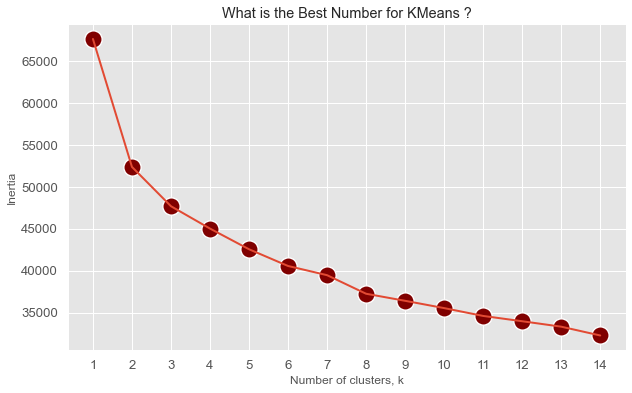

In [142]:
from sklearn.cluster import KMeans
df_fix = df_set.drop(columns=['Unnamed: 0','ID']).copy()

inertia=[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_fix)
    inertia.append(kmeans.inertia_)
    
f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1,15), y=inertia, linewidth=2)
sns.scatterplot(x=range(1,15), y=inertia, s=300, color='#800000')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(range(1,15))
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [160]:
(pd.Series(inertia)-pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0     22.581658
1      8.963925
2      5.595897
3      5.485092
4      4.692181
5      2.709734
6      5.620194
7      2.264688
8      2.390895
9      2.635552
10     1.830208
11     1.910975
12     3.156818
13          NaN
dtype: float64

From elbow method we can see decrement value from 3 to 4 cluster significant and increasing number of cluster do not show any significant decrement anymore. So we can conclude that the best number of cluster is 4 Clusters.

In [144]:
kmeans = KMeans(n_clusters= 4, random_state=42)
kmeans.fit(df_fix)
df_fix['clusters'] = kmeans.labels_
df_fix.sample(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_transaction,Age,Total_Spent,AgeGroup,Conversion_Rate,clusters
73,0.514126,4,0,0.348495,1.035458,0.908443,1.350095,0.768944,-0.511673,-0.455940,-0.686798,-0.512236,-0.483349,1.421677,1.812698,-0.226885,0.678183,0.689304,-0.282462,3.528629,-0.281525,-0.262295,-0.117417,-0.098036,0.0,0.0,-0.421651,1.198906,-0.514126,0.092229,3,-0.200844,2
2016,1.181772,2,0,-0.614554,-0.826172,-0.931800,-1.209303,-0.895502,-0.587261,-0.687550,-0.411663,-0.147526,-0.658296,-0.699182,-0.770752,-0.578365,-1.174537,1.521372,-0.282462,-0.283396,-0.281525,-0.262295,-0.117417,-0.098036,0.0,0.0,2.371629,-1.161223,-1.181772,-0.895596,2,-0.765672,0
417,2.099785,2,1,1.136312,-0.826172,-0.931800,-1.313063,1.956564,-0.007755,0.529536,0.267003,-0.025956,-0.347278,-0.699182,-0.770752,1.530517,1.604543,-0.142764,-0.282462,3.528629,3.552082,3.812507,8.516650,-0.098036,0.0,0.0,-0.421651,0.805551,-2.099785,1.282599,1,-0.043081,1
1323,0.681038,2,2,-0.574805,2.897088,-0.931800,-0.725093,-0.392022,-0.461282,-0.265203,-0.558402,-0.609492,2.568516,0.891462,1.074569,-0.226885,-0.865750,1.521372,3.540303,-0.283396,-0.281525,-0.262295,-0.117417,10.200373,0.0,0.0,2.371629,0.149960,-0.681038,-0.219890,3,-0.538442,0
144,1.599050,2,1,-0.408824,1.035458,-0.931800,-1.243890,-0.809615,0.193812,-0.564933,0.652192,-0.269096,1.402199,0.361248,-0.032624,-0.226885,-0.865750,0.689304,-0.282462,-0.283396,-0.281525,-0.262295,-0.117417,-0.098036,0.0,0.0,-0.421651,-0.374513,-1.599050,-0.487184,1,-0.551427,0


Visualize data to see each cluster

<AxesSubplot:xlabel='Total_Spent', ylabel='Income'>

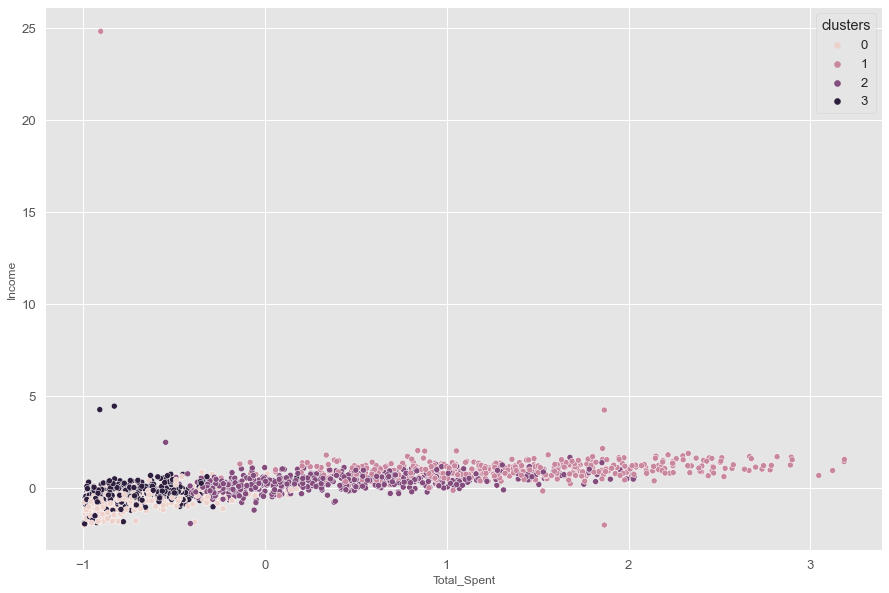

In [150]:
plt.figure(figsize=(15,10))
sns.scatterplot(data= df_fix, x='Total_Spent', y='Income', hue='clusters')

## Model Evaluation

We do the model evaluation using Silhoutte Score

In [158]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(10,7))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='Reds')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

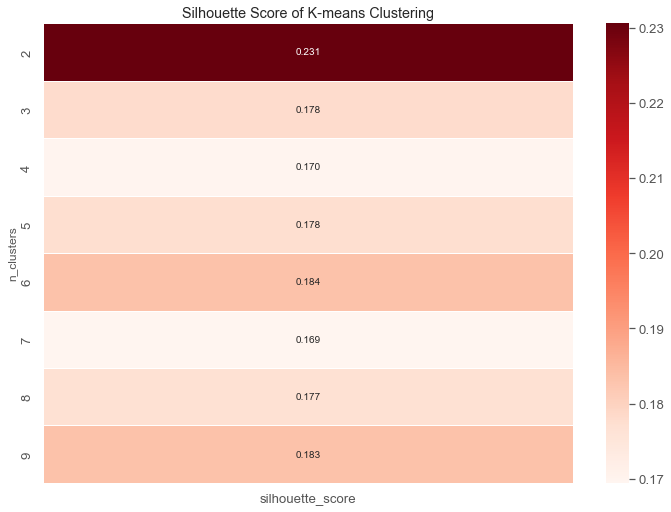

In [159]:
visualize_silhouette_layer(df_fix)

Our Clustering that is 4 clusters is up to 0.17 that means 4  clusters are not really well apart from each other.

# Cluster Analysis & Interpretation

In [165]:
df['clusters'] = kmeans.labels_

In [166]:
df.groupby('clusters')['Income','Total_Spent'].describe()

/var/folders/4d/lml51zh168d2862vn727kr6h0000gn/T/ipykernel_16173/2360672061.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('clusters')['Income','Total_Spent'].describe()


Income                                                     \
          count          mean           std        min         25%   
clusters                                                             
0         647.0  3.161910e+07  1.171440e+07  1730000.0  23386500.0   
1         507.0  7.818912e+07  2.815785e+07  2447000.0  70908500.0   
2         567.0  6.041191e+07  1.034716e+07  4428000.0  54418000.0   
3         485.0  4.199435e+07  1.410867e+07  4023000.0  34053000.0   

                                              Total_Spent                \
                 50%         75%          max       count          mean   
clusters                                                                  
0         31163000.0  38755000.0   73395000.0       647.0  1.127032e+05   
1         77457000.0  82579000.0  666666000.0       507.0  1.424992e+06   
2         60896000.0  66689500.0  113734000.0       567.0  8.349665e+05   
3         42429000.0  49605000.0  162397000.0       485.0  1.377340e+05   

                                                                               
                    std       min        25%        50%        75%        max  
clusters                                                                       
0         125752.367495    5000.0    37000.0    63000.0   130000.0   727000.0  
1         413568.716106   62000.0  1115000.0  1395000.0  1698500.0  2525000.0  
2         335575.962772  277000.0   562000.0   793000.0  1048000.0  1829000.0  
3         113786.942858    6000.0    45000.0    94000.0   223000.0   711000.0

In [167]:
map_cluster = {
    0 : 'Potential Churn',
    1 : 'High Spent',
    2 : 'Mid Spent',
    3 : 'Low Spent'
}

df['cluster_mapped'] = df['clusters'].map(map_cluster)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'High Spent'),
  Text(1, 0, 'Low Spent'),
  Text(2, 0, 'Mid Spent'),
  Text(3, 0, 'Potential Churn')])

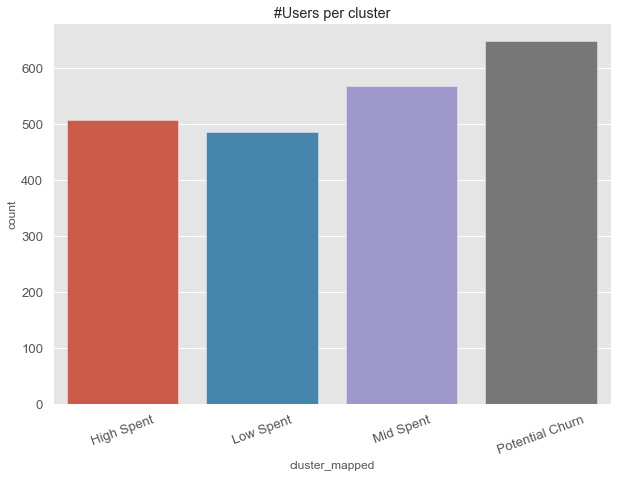

In [170]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['cluster_mapped'])
plt.title('#Users per cluster')
plt.xticks(rotation=20)

<AxesSubplot:xlabel='Total_Spent', ylabel='Income'>

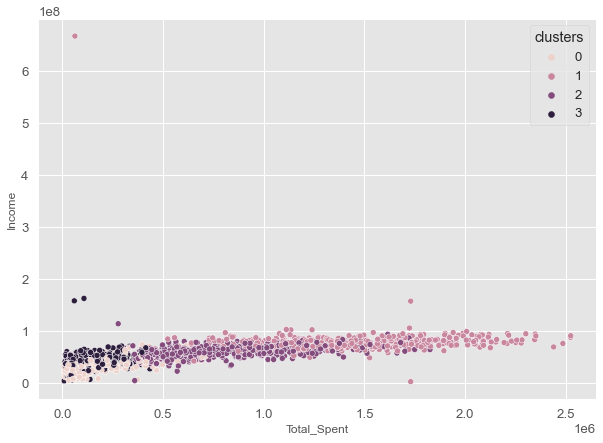

In [174]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x=df['Total_Spent'], y=df['Income'], hue=df['clusters'])

## Spending per Cluster

Text(0.5, 1.0, 'Total Spent per Cluster')

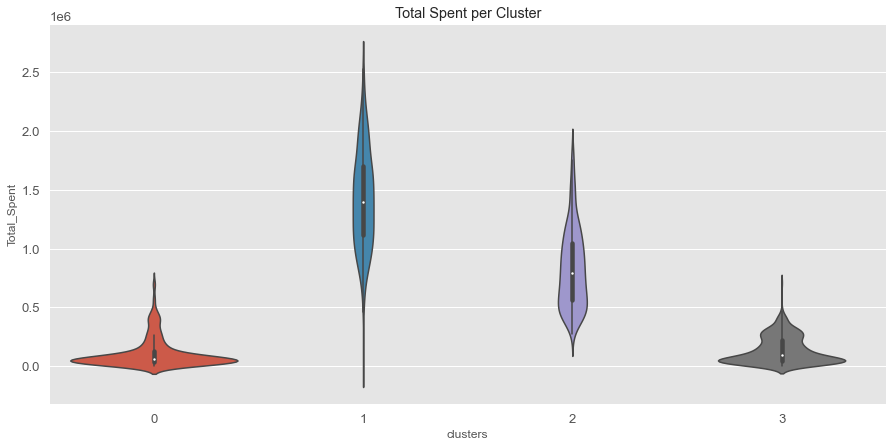

In [182]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df['clusters'], y=df['Total_Spent'])
plt.title('Total Spent per Cluster')


## Income per Cluster

(0.0, 120000000.0)

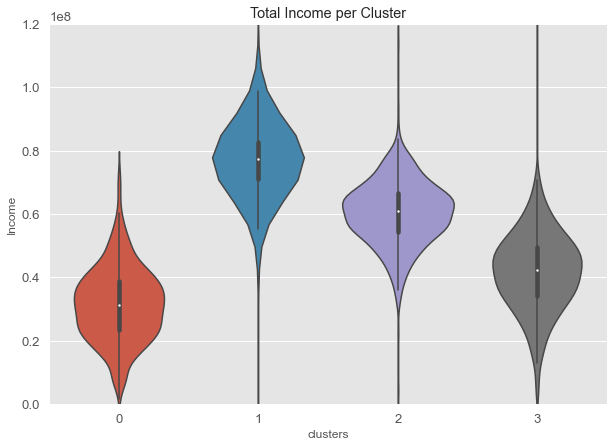

In [178]:
plt.figure(figsize=(10,7))
sns.violinplot(x=df['clusters'], y=df['Income'])
plt.title('Total Income per Cluster')
plt.ylim(0, 120000000)

## Conversion per Cluster

Text(0.5, 1.0, 'CVR per Cluster')

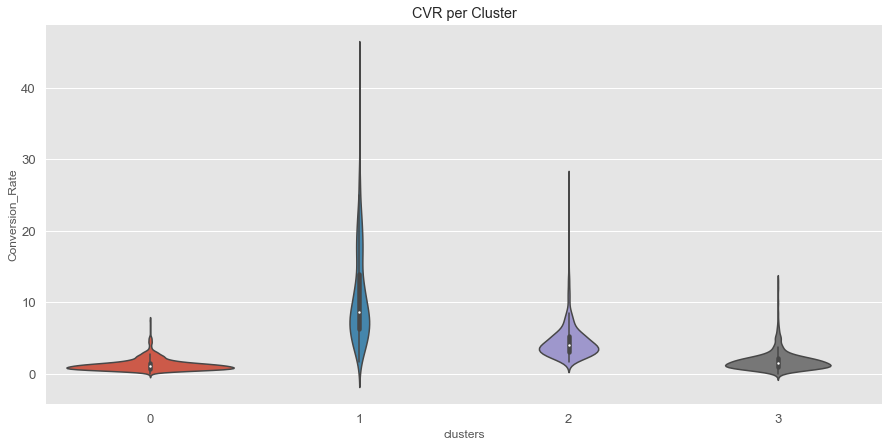

In [181]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df['clusters'], y=df['Conversion_Rate'])
plt.title('CVR per Cluster')

## Web Visit Per Cluster

Text(0.5, 1.0, 'Total Web Visit per Cluster')

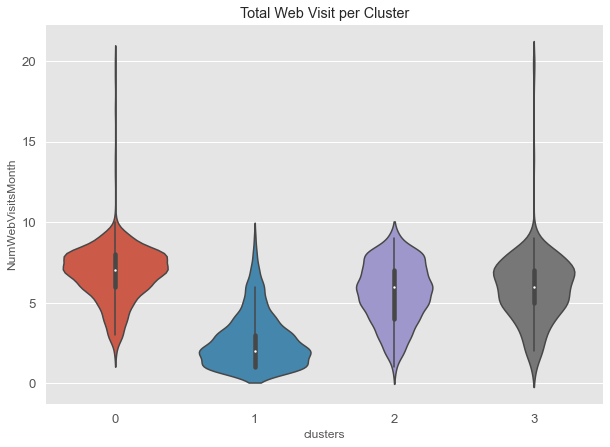

In [185]:
plt.figure(figsize=(10,7))
sns.violinplot(x=df['clusters'], y=df['NumWebVisitsMonth'])
plt.title('Total Web Visit per Cluster')

## Total Transaction per Cluster

Text(0.5, 1.0, 'Total Transaction per Cluster')

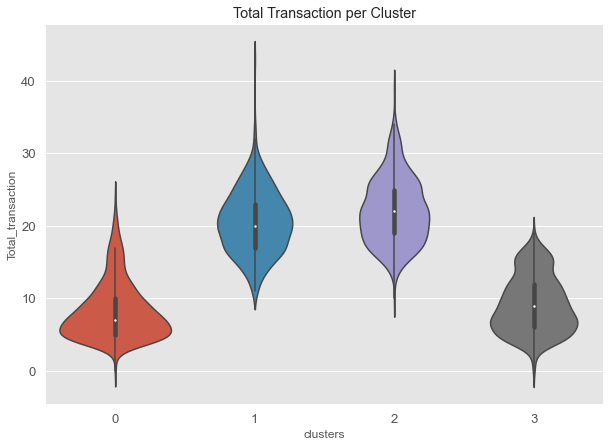

In [187]:
plt.figure(figsize=(10,7))
sns.violinplot(x=df['clusters'], y=df['Total_transaction'])
plt.title('Total Transaction per Cluster')

## Age Per Cluster

Text(0.5, 1.0, 'Age per Cluster')

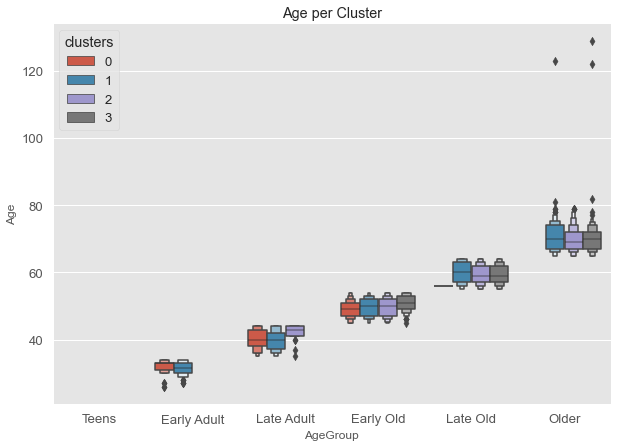

In [203]:
plt.figure(figsize=(10,7))
sns.boxenplot(x=df['AgeGroup'], y=df['Age'], hue = df['clusters'])
plt.title('Age per Cluster')

In [204]:
df.cluster_mapped.value_counts()

Potential Churn    647
Mid Spent          567
High Spent         507
Low Spent          485
Name: cluster_mapped, dtype: int64

##  Cluster Interpretation

1. Potential Churn:
- Kelompok ini adalah kelompok dengan jumlah user terbesar yaitu sebanyak 647 orang yang didominasi oleh early_old (45-55 tahun) dan late_adult (35-45 tahun) dan sedikit di kelompok early_adult (25-35 tahun) .
- Kelompok ini mengunjungi website paling sering, dengan median sebanyak 8 kali dalam sebulan, walaupun demikian, kelompok ini cukup jarang melakukan transaksi dengan rata-rata total transaksi berada di bawah 10 kali.
- Kelompok ini juga mempunyai total pendapatan dan pengeluaran paling rendah dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 31 Juta untuk total pendapatan setahun, dan IDR 63K untuk pengeluaran dalam setahun


2. High Spent:
- Kelompok ini adalah kelompok paling beragam dengan berada di semua kalangan umur.
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling besar di setiap bulannya, yang masing-masing sebesar IDR 77 Juta untuk total pendapatan setahun, dan IDR 13 Juta untuk pengeluaran dalam setahun
- Namun, kelompok ini adalah kelompok yang paling jarang mengunjungi web dengan median total kunjungan 3 kali dalam sebulan, walaupun demikian, mereka sering bertransaksi dan juga menggunakan promo pada transaksinya.
- Secara campaign mereka cukup beragam dan bisa dikatakan lebih organic dibanding yang lainnya.


3. Mid Spent:
- Didominasi oleh umur di atas 40 tahun dan memiliki keragaman hampir di semua kelompok umur kecuali early-adult serta memiliki user kedua terbanyak yaitu sebesar 567 orang.
- Kelompok ini mempunyai total pendapatan dan pengeluaran terbesar kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 60 Juta untuk total pendapatan setahun, dan IDR 800K untuk pengeluaran dalam setahun
- Walaupun terhitung jarang untuk visit web, Kelompok ini adalah kelompok yang termasuk sering merespon campaign kita dan yang paling sering menggunakan promo dalam sebulannya dengan rata-rata penggunaan promo sebanyak 3 kali dalam sebulan.


4. Low Spent:
- Kelompok ini adalah kelompok dengan jumlah user terkecil sebanyak 485 orang yang di dominasi oleh early_old (45-55 tahun), late_old (55-65 tahun) dan terbanyak pada older (>65 tahun).
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan kedua paling kecil dan pengeluaran paling kecil kedua di setiap bulannya, yang masing-masing sebesar IDR 42 Juta untuk total pendapatan setahun, dan IDR 94k untuk pengeluaran dalam setahun
- Cluster ini cukup rendah dalam merespon campaign, dan memiliki kunjungan web yang termasuk cukup sering namun conversion rate mua cenderung rendah.

## Recommendation dan Expected Impact 

Recommendation:
1. Tetap monitor transaksi dan retensi dari kelompok High Spent, Fokus untuk tingkatkan service agar kelompok kelompok ini tidak churn karena kelompok ini mempunyai conversion rate, total spent dan total transaksi tertinggi.
2. Untuk kelompok Mid Spent dapat dilakukan analisis lebih lanjut bagaimana agar meningkatkan transaksinya dengan memberikan rekomendasi yang lebih personal, serta analisis lebih dalam bagaimana untuk optimasi promo pada segmen ini dan tetap berbelanja di platform kita.
3. Untuk kelompok Low Spent dan Potential Churn, juga dapat dilakukan analisis lebih lanjut bagaimana meningkatkan rasio konversi visit to transaction, Mereka mempunyai jumlah visit yang cukup tinggi tapi tidak melakukan transaksi. Hal ini dapat disebabkan oleh produk ataupun harga yang tidak cocok.

Expected Impact:
- Jika kita fokus untuk terus monitor kelompok High Spent, kita akan tetap mendapatkan keuntungan sebesar IDR 550 Juta / bulan, sedangkan untuk kelompok Mid Spender sebesar IDR 38 Juta/bulan.